# GA-SEG demo (Kaggle-ready)
This notebook runs a minimal PatchCore-style demo from the `gaseg` repo and shows how to evaluate and compare results with a previous CSV.

Notes: this notebook expects the repository files to be present in the working directory (upload the repo to Kaggle or clone it). The MVTec dataset should be available under `mvtec_anomaly_detection/` (the repo already contains a local copy in this workspace).

## Setup and dependencies
- Kaggle kernels usually have PyTorch and torchvision preinstalled. Faiss may not be present; this notebook handles its absence.
- If you need additional packages, install them via `pip` in a cell (this may increase runtime).

In [1]:
# Basic imports and repository path setup
import os, sys
# If you uploaded the repo as a folder, adjust this path accordingly.
repo_root = os.getcwd()  # assume working dir is repo root on Kaggle
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)
print('Repository root:', repo_root)
# show a quick listing
print('Top-level files:', os.listdir(repo_root)[:40])

Repository root: c:\Users\Sai Mohith\Github\gaseg
Top-level files: ['.git', '.gitignore', 'cache_feats', 'data', 'dataset_link.txt', 'Dockerfile', 'docs', 'env', 'evaluate.py', 'GA_SEG_demo_kaggle.ipynb', 'Improvements.md', 'mvtec_anomaly_detection', 'notebooks', 'README.md', 'requirements.txt', 'results_mvtec.csv', 'run_experiments.py', 'sample.py', 'src']


In [2]:
# imports from the repo
import torch
from torch.utils.data import DataLoader
from src.datasets.mvtec_loader import MVTecDataset
from src.backbones.resnet_features import ResNetBackbone
from src.baselines.improved_patchcore import ImprovedPatchCore
from src.eval.metrics import image_auc, pixel_auc, compute_aupro
import numpy as np
from tqdm import tqdm
import cv2

# optional: check faiss availability (not used by ImprovedPatchCore)
try:
    import faiss
    print('faiss available (not used by ImprovedPatchCore)')
except Exception as e:
    faiss = None
    print('faiss not available:', e)

faiss available (not used by ImprovedPatchCore)



=== Category: bottle ===
[DEBUG] Loaded 209 images for bottle/train from mvtec_anomaly_detection\bottle\train
[DEBUG] Loaded 83 images for bottle/test from mvtec_anomaly_detection\bottle\test


Building memory: 100%|██████████| 27/27 [00:46<00:00,  1.72s/it]



[DEBUG] Total patches before sampling: (214016, 1536)
[DEBUG] Subsampling to 1070 patches


Greedy sampling: 100%|██████████| 1069/1069 [31:08<00:00,  1.75s/it]



[DEBUG] greedy_coreset_sampling took 1871.568 seconds
[DEBUG] Coreset subsampled size: (1070, 1536)
[DEBUG] NearestNeighbors.fit took 0.066 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1070, 1536)
Memory shape: (1070, 1536)


Testing bottle: 100%|██████████| 21/21 [00:49<00:00,  2.37s/it]



Image-AUROC: 0.9778
Pixel-AUROC: 0.9437
AUPRO: 0.2537


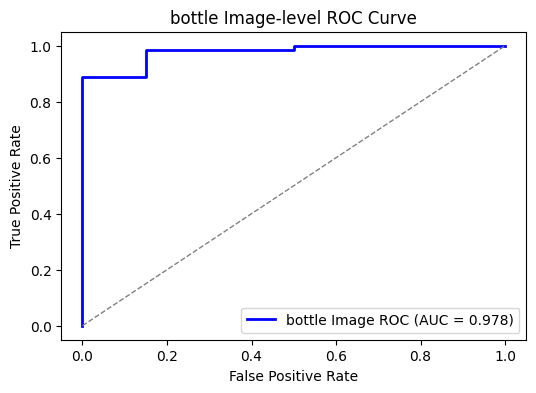

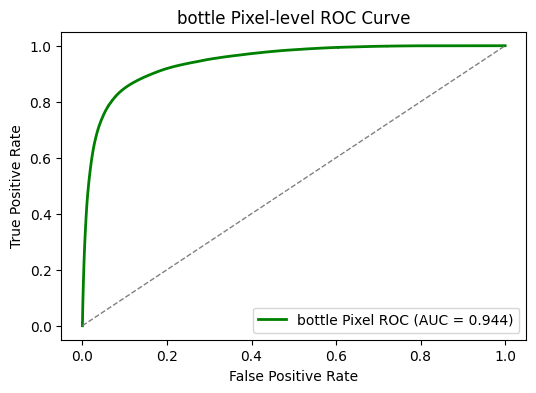


=== Category: cable ===
[DEBUG] Loaded 224 images for cable/train from mvtec_anomaly_detection\cable\train
[DEBUG] Loaded 150 images for cable/test from mvtec_anomaly_detection\cable\test


Building memory: 100%|██████████| 28/28 [01:48<00:00,  3.86s/it]



[DEBUG] Total patches before sampling: (229376, 1536)
[DEBUG] Subsampling to 1146 patches


Greedy sampling: 100%|██████████| 1145/1145 [36:34<00:00,  1.92s/it] 



[DEBUG] greedy_coreset_sampling took 2198.815 seconds
[DEBUG] Coreset subsampled size: (1146, 1536)
[DEBUG] NearestNeighbors.fit took 0.028 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1146, 1536)
Memory shape: (1146, 1536)


Testing cable: 100%|██████████| 38/38 [01:15<00:00,  1.98s/it]



Image-AUROC: 0.7736
Pixel-AUROC: 0.9313
AUPRO: 0.2198


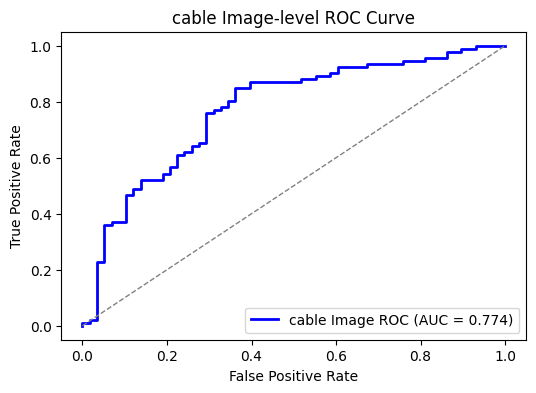

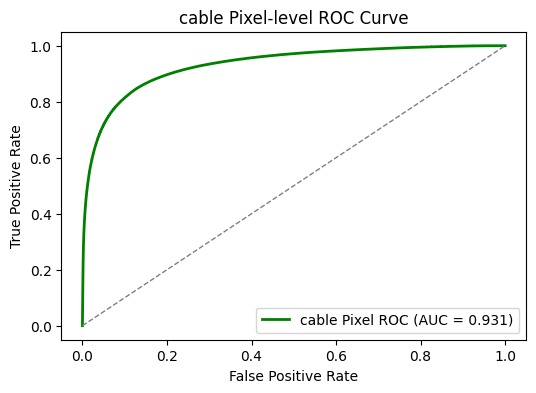


=== Category: capsule ===
[DEBUG] Loaded 219 images for capsule/train from mvtec_anomaly_detection\capsule\train
[DEBUG] Loaded 132 images for capsule/test from mvtec_anomaly_detection\capsule\test


Building memory: 100%|██████████| 28/28 [01:43<00:00,  3.69s/it]



[DEBUG] Total patches before sampling: (224256, 1536)
[DEBUG] Subsampling to 1121 patches


Greedy sampling: 100%|██████████| 1120/1120 [31:13<00:00,  1.67s/it] 



[DEBUG] greedy_coreset_sampling took 1876.353 seconds
[DEBUG] Coreset subsampled size: (1121, 1536)
[DEBUG] NearestNeighbors.fit took 0.014 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1121, 1536)


Testing capsule: 100%|██████████| 33/33 [00:46<00:00,  1.40s/it]



Image-AUROC: 0.6019
Pixel-AUROC: 0.9270
AUPRO: 0.2394


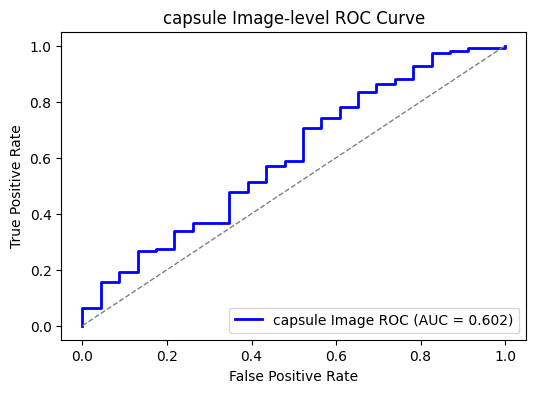

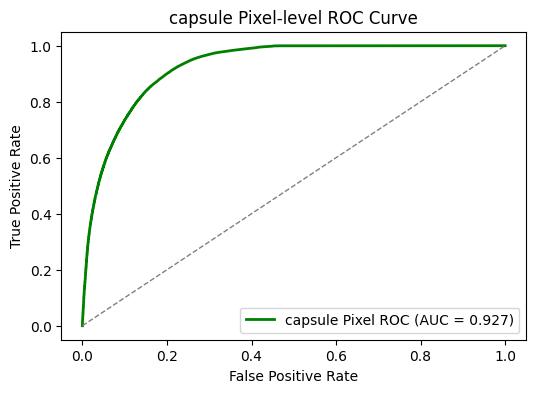


=== Category: carpet ===
[DEBUG] Loaded 280 images for carpet/train from mvtec_anomaly_detection\carpet\train
[DEBUG] Loaded 117 images for carpet/test from mvtec_anomaly_detection\carpet\test


Building memory: 100%|██████████| 35/35 [01:41<00:00,  2.90s/it]



[DEBUG] Total patches before sampling: (286720, 1536)
[DEBUG] Subsampling to 1433 patches


Greedy sampling: 100%|██████████| 1432/1432 [52:19<00:00,  2.19s/it] 



[DEBUG] greedy_coreset_sampling took 3143.111 seconds
[DEBUG] Coreset subsampled size: (1433, 1536)
[DEBUG] NearestNeighbors.fit took 0.021 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1433, 1536)
Memory shape: (1433, 1536)


Testing carpet: 100%|██████████| 30/30 [00:52<00:00,  1.74s/it]



Image-AUROC: 0.5995
Pixel-AUROC: 0.6623
AUPRO: 0.1054


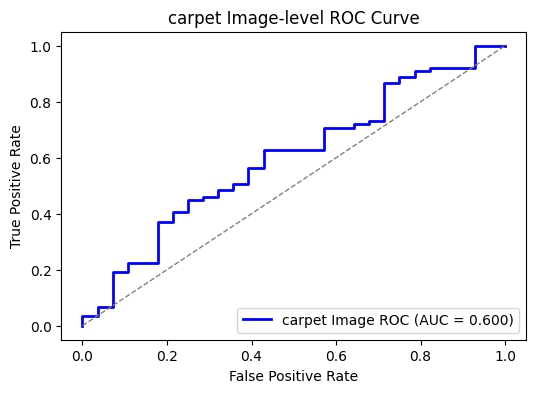

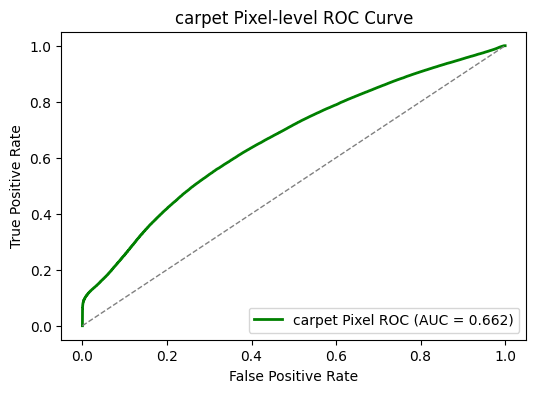


=== Category: grid ===
[DEBUG] Loaded 264 images for grid/train from mvtec_anomaly_detection\grid\train
[DEBUG] Loaded 78 images for grid/test from mvtec_anomaly_detection\grid\test


Building memory: 100%|██████████| 33/33 [01:08<00:00,  2.07s/it]



[DEBUG] Total patches before sampling: (270336, 1536)
[DEBUG] Subsampling to 1351 patches


Greedy sampling: 100%|██████████| 1350/1350 [42:57<00:00,  1.91s/it]



[DEBUG] greedy_coreset_sampling took 2580.726 seconds
[DEBUG] Coreset subsampled size: (1351, 1536)
[DEBUG] NearestNeighbors.fit took 0.123 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1351, 1536)
Memory shape: (1351, 1536)


Testing grid: 100%|██████████| 20/20 [00:34<00:00,  1.71s/it]



Image-AUROC: 0.1637
Pixel-AUROC: 0.4998
AUPRO: 0.0326


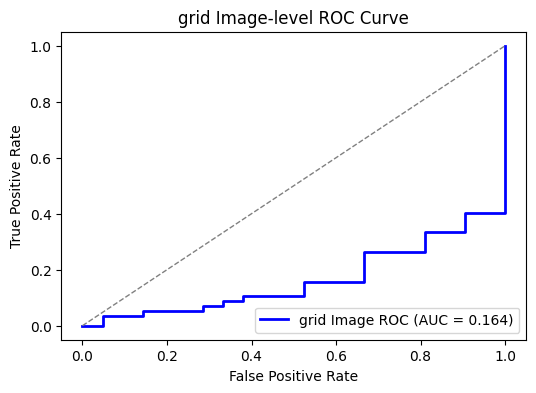

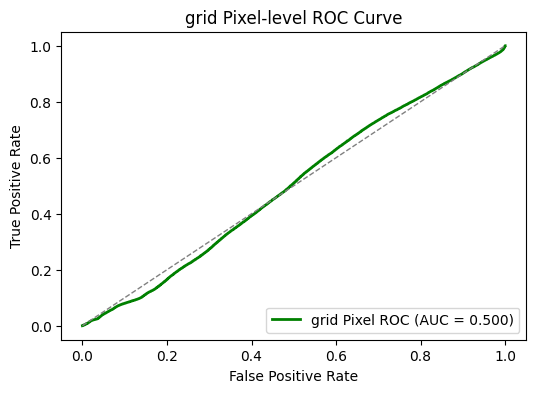


=== Category: hazelnut ===
[DEBUG] Loaded 391 images for hazelnut/train from mvtec_anomaly_detection\hazelnut\train
[DEBUG] Loaded 110 images for hazelnut/test from mvtec_anomaly_detection\hazelnut\test


Building memory: 100%|██████████| 49/49 [02:27<00:00,  3.00s/it]



[DEBUG] Total patches before sampling: (400384, 1536)
[DEBUG] Subsampling to 2001 patches


Greedy sampling: 100%|██████████| 2000/2000 [2:25:33<00:00,  4.37s/it]  



[DEBUG] greedy_coreset_sampling took 8741.093 seconds
[DEBUG] Coreset subsampled size: (2001, 1536)
[DEBUG] NearestNeighbors.fit took 0.141 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (2001, 1536)
Memory shape: (2001, 1536)


Testing hazelnut: 100%|██████████| 28/28 [00:38<00:00,  1.39s/it]



Image-AUROC: 0.9004
Pixel-AUROC: 0.9710
AUPRO: 0.2608


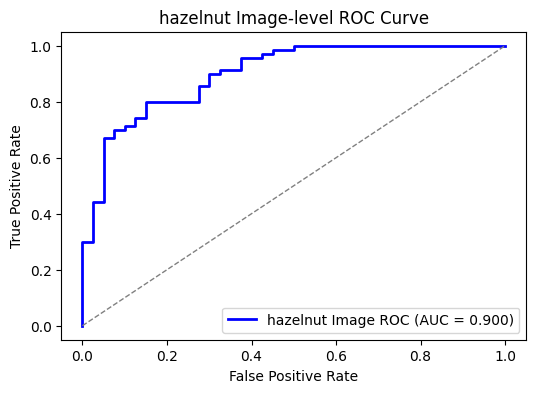

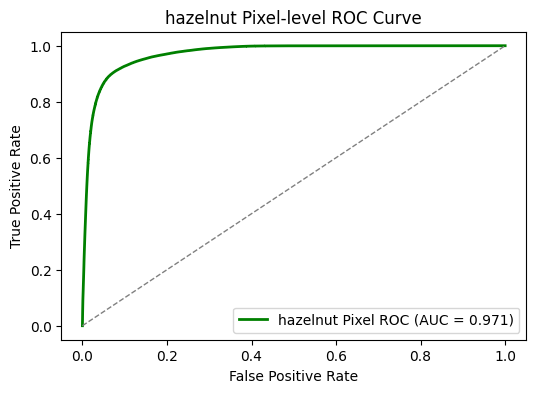


=== Category: leather ===
[DEBUG] Loaded 245 images for leather/train from mvtec_anomaly_detection\leather\train
[DEBUG] Loaded 124 images for leather/test from mvtec_anomaly_detection\leather\test


Building memory: 100%|██████████| 31/31 [00:56<00:00,  1.82s/it]



[DEBUG] Total patches before sampling: (250880, 1536)
[DEBUG] Subsampling to 1254 patches


Greedy sampling: 100%|██████████| 1253/1253 [36:03<00:00,  1.73s/it]



[DEBUG] greedy_coreset_sampling took 2166.114 seconds
[DEBUG] Coreset subsampled size: (1254, 1536)
[DEBUG] NearestNeighbors.fit took 0.037 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1254, 1536)


Testing leather: 100%|██████████| 31/31 [01:29<00:00,  2.90s/it]



Image-AUROC: 0.7218
Pixel-AUROC: 0.4712
AUPRO: 0.0359


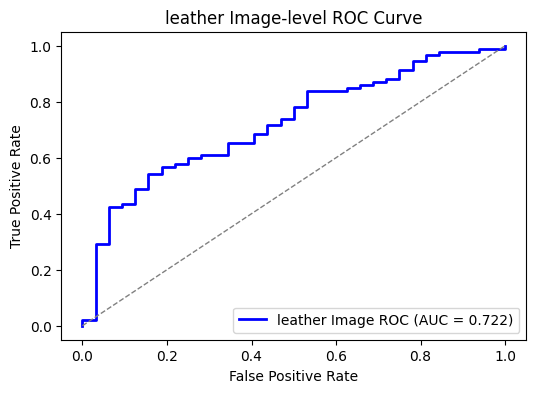

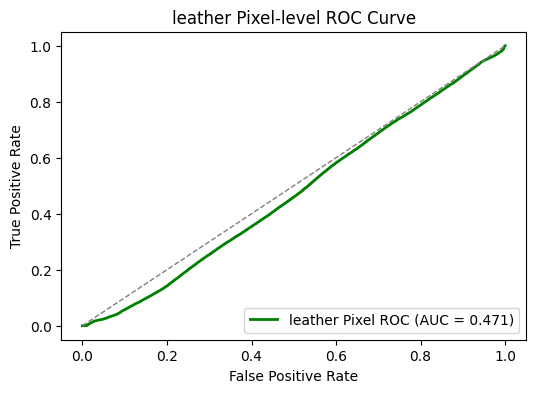


=== Category: metal_nut ===
[DEBUG] Loaded 220 images for metal_nut/train from mvtec_anomaly_detection\metal_nut\train
[DEBUG] Loaded 115 images for metal_nut/test from mvtec_anomaly_detection\metal_nut\test


Building memory: 100%|██████████| 28/28 [02:11<00:00,  4.70s/it]



[DEBUG] Total patches before sampling: (225280, 1536)
[DEBUG] Subsampling to 1126 patches


Greedy sampling: 100%|██████████| 1125/1125 [35:10<00:00,  1.88s/it] 



[DEBUG] greedy_coreset_sampling took 2115.093 seconds
[DEBUG] Coreset subsampled size: (1126, 1536)
[DEBUG] NearestNeighbors.fit took 0.047 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1126, 1536)
Memory shape: (1126, 1536)


Testing metal_nut: 100%|██████████| 29/29 [00:58<00:00,  2.01s/it]



Image-AUROC: 0.6872
Pixel-AUROC: 0.9371
AUPRO: 0.2287


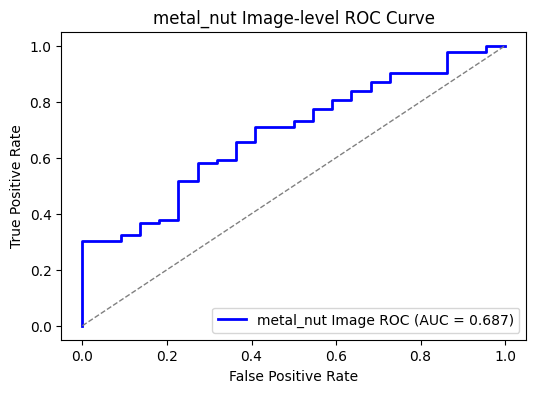

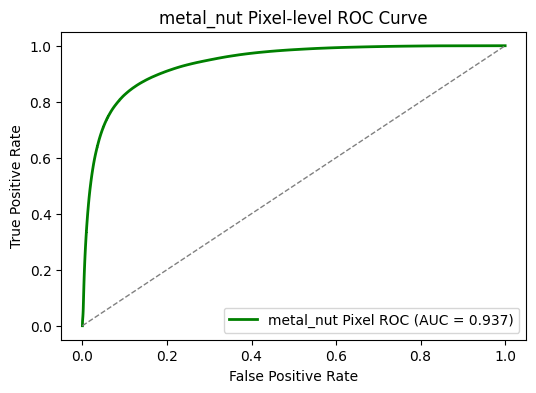


=== Category: pill ===
[DEBUG] Loaded 267 images for pill/train from mvtec_anomaly_detection\pill\train
[DEBUG] Loaded 167 images for pill/test from mvtec_anomaly_detection\pill\test
[DEBUG] Loaded 167 images for pill/test from mvtec_anomaly_detection\pill\test


Building memory: 100%|██████████| 34/34 [02:49<00:00,  4.99s/it]



[DEBUG] Total patches before sampling: (273408, 1536)
[DEBUG] Subsampling to 1367 patches


Greedy sampling: 100%|██████████| 1366/1366 [44:54<00:00,  1.97s/it] 



[DEBUG] greedy_coreset_sampling took 2699.789 seconds
[DEBUG] Coreset subsampled size: (1367, 1536)
[DEBUG] NearestNeighbors.fit took 0.019 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1367, 1536)
Memory shape: (1367, 1536)


Testing pill: 100%|██████████| 42/42 [00:51<00:00,  1.22s/it]



Image-AUROC: 0.3890
Pixel-AUROC: 0.7696
AUPRO: 0.1687


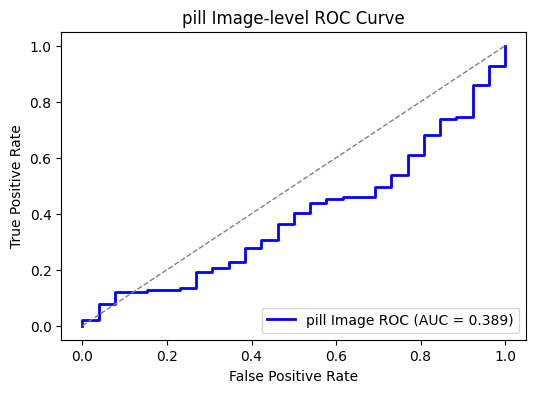

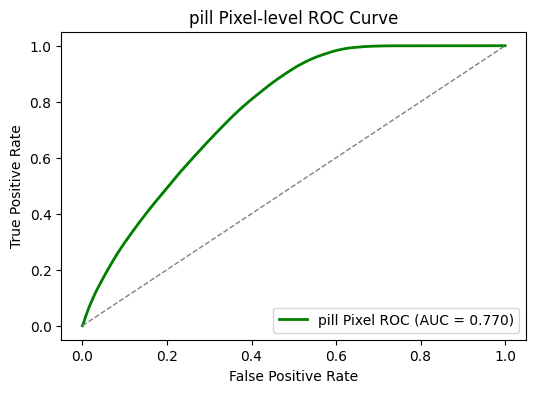


=== Category: screw ===
[DEBUG] Loaded 320 images for screw/train from mvtec_anomaly_detection\screw\train
[DEBUG] Loaded 160 images for screw/test from mvtec_anomaly_detection\screw\test


Building memory: 100%|██████████| 40/40 [00:58<00:00,  1.45s/it]



[DEBUG] Total patches before sampling: (327680, 1536)
[DEBUG] Subsampling to 1638 patches


Greedy sampling: 100%|██████████| 1637/1637 [1:10:14<00:00,  2.57s/it]



[DEBUG] greedy_coreset_sampling took 4221.777 seconds
[DEBUG] Coreset subsampled size: (1638, 1536)
[DEBUG] NearestNeighbors.fit took 0.123 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1638, 1536)
Memory shape: (1638, 1536)


Testing screw: 100%|██████████| 40/40 [02:19<00:00,  3.49s/it]



Image-AUROC: 0.7366
Pixel-AUROC: 0.9719
AUPRO: 0.2729


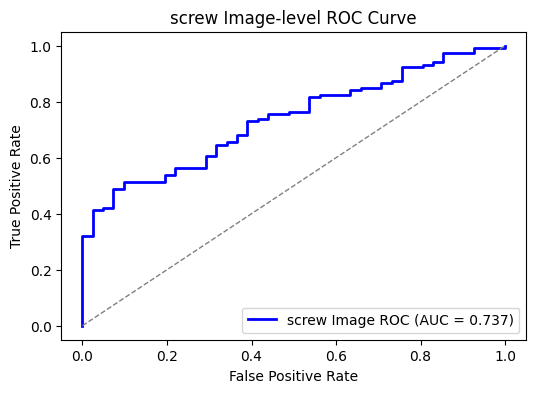

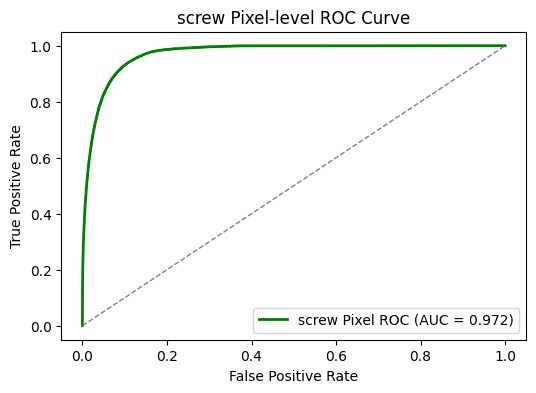


=== Category: tile ===
[DEBUG] Loaded 230 images for tile/train from mvtec_anomaly_detection\tile\train
[DEBUG] Loaded 117 images for tile/test from mvtec_anomaly_detection\tile\test
[DEBUG] Loaded 117 images for tile/test from mvtec_anomaly_detection\tile\test


Building memory: 100%|██████████| 29/29 [02:07<00:00,  4.40s/it]



[DEBUG] Total patches before sampling: (235520, 1536)
[DEBUG] Subsampling to 1177 patches


Greedy sampling: 100%|██████████| 1176/1176 [1:04:41<00:00,  3.30s/it]



[DEBUG] greedy_coreset_sampling took 3884.034 seconds
[DEBUG] Coreset subsampled size: (1177, 1536)
[DEBUG] NearestNeighbors.fit took 0.030 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1177, 1536)


Testing tile: 100%|██████████| 30/30 [00:30<00:00,  1.03s/it]



Image-AUROC: 0.5061
Pixel-AUROC: 0.5206
AUPRO: 0.0809


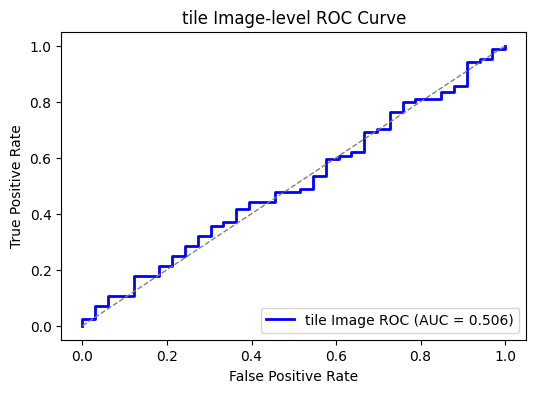

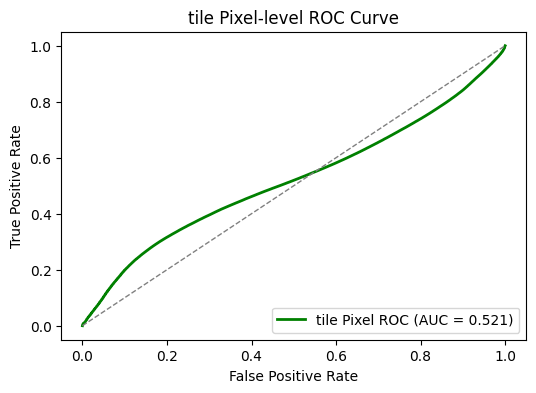


=== Category: toothbrush ===
[DEBUG] Loaded 60 images for toothbrush/train from mvtec_anomaly_detection\toothbrush\train
[DEBUG] Loaded 42 images for toothbrush/test from mvtec_anomaly_detection\toothbrush\test


Building memory: 100%|██████████| 8/8 [00:11<00:00,  1.43s/it]



[DEBUG] Total patches before sampling: (61440, 1536)
[DEBUG] Subsampling to 307 patches


Greedy sampling: 100%|██████████| 306/306 [01:42<00:00,  2.97it/s]



[DEBUG] greedy_coreset_sampling took 103.477 seconds
[DEBUG] Coreset subsampled size: (307, 1536)
[DEBUG] NearestNeighbors.fit took 0.001 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (307, 1536)


Testing toothbrush: 100%|██████████| 11/11 [00:09<00:00,  1.21it/s]



Image-AUROC: 0.5444
Pixel-AUROC: 0.8385
AUPRO: 0.1807


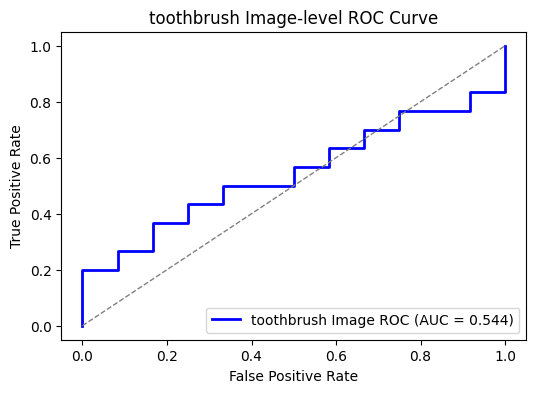

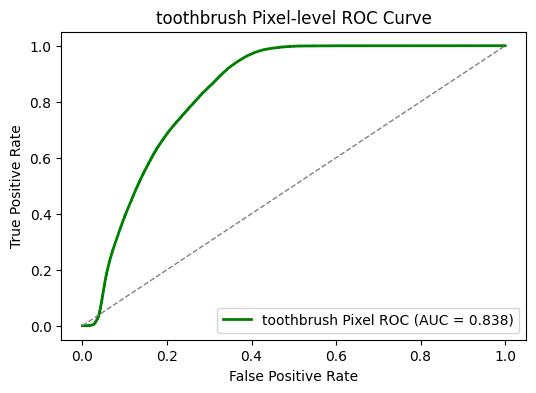


=== Category: transistor ===
[DEBUG] Loaded 213 images for transistor/train from mvtec_anomaly_detection\transistor\train
[DEBUG] Loaded 100 images for transistor/test from mvtec_anomaly_detection\transistor\test


Building memory: 100%|██████████| 27/27 [00:40<00:00,  1.49s/it]



[DEBUG] Total patches before sampling: (218112, 1536)
[DEBUG] Subsampling to 1090 patches


Greedy sampling: 100%|██████████| 1089/1089 [25:49<00:00,  1.42s/it]



[DEBUG] greedy_coreset_sampling took 1551.047 seconds
[DEBUG] Coreset subsampled size: (1090, 1536)
[DEBUG] NearestNeighbors.fit took 0.028 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1090, 1536)


Testing transistor: 100%|██████████| 25/25 [00:26<00:00,  1.06s/it]



Image-AUROC: 0.5879
Pixel-AUROC: 0.7511
AUPRO: 0.2128


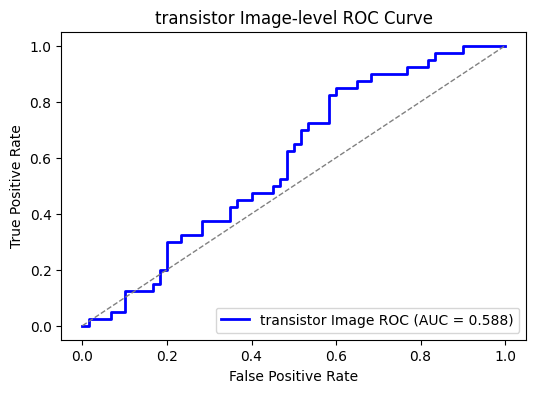

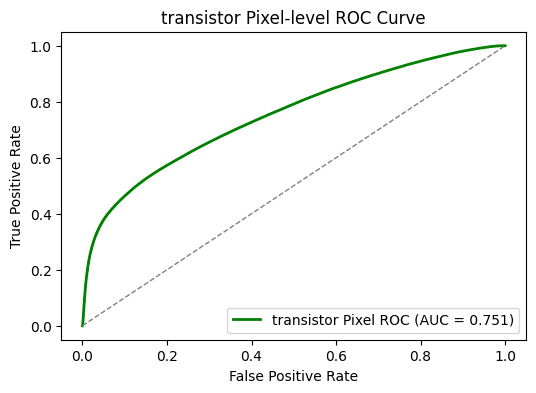


=== Category: wood ===
[DEBUG] Loaded 247 images for wood/train from mvtec_anomaly_detection\wood\train
[DEBUG] Loaded 79 images for wood/test from mvtec_anomaly_detection\wood\test


Building memory: 100%|██████████| 31/31 [01:39<00:00,  3.20s/it]



[DEBUG] Total patches before sampling: (252928, 1536)
[DEBUG] Subsampling to 1264 patches


Greedy sampling: 100%|██████████| 1263/1263 [26:34<00:00,  1.26s/it]



[DEBUG] greedy_coreset_sampling took 1598.010 seconds
[DEBUG] Coreset subsampled size: (1264, 1536)
[DEBUG] NearestNeighbors.fit took 0.004 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1264, 1536)


Testing wood: 100%|██████████| 20/20 [00:21<00:00,  1.09s/it]



Image-AUROC: 0.2623
Pixel-AUROC: 0.3626
AUPRO: 0.0285


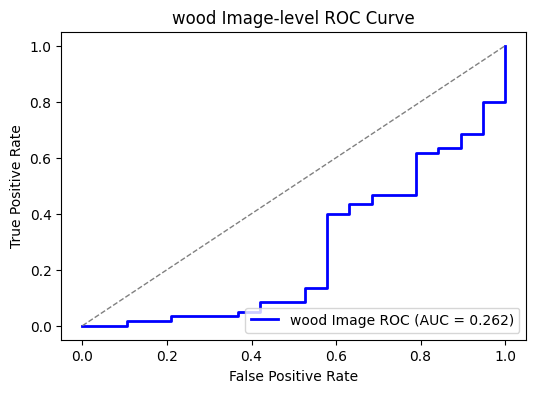

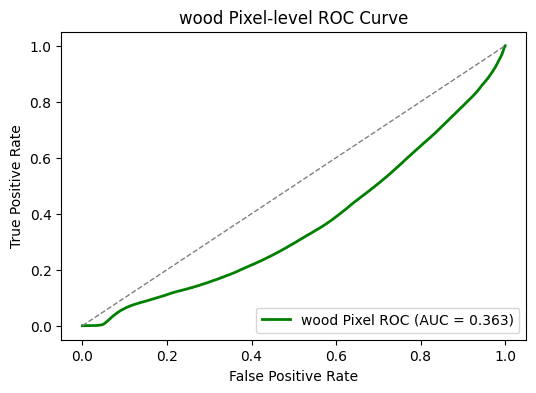


=== Category: zipper ===
[DEBUG] Loaded 240 images for zipper/train from mvtec_anomaly_detection\zipper\train
[DEBUG] Loaded 151 images for zipper/test from mvtec_anomaly_detection\zipper\test


Building memory: 100%|██████████| 30/30 [00:38<00:00,  1.29s/it]



[DEBUG] Total patches before sampling: (245760, 1536)
[DEBUG] Subsampling to 1228 patches


Greedy sampling: 100%|██████████| 1227/1227 [25:54<00:00,  1.27s/it]



[DEBUG] greedy_coreset_sampling took 1556.723 seconds
[DEBUG] Coreset subsampled size: (1228, 1536)
[DEBUG] NearestNeighbors.fit took 0.005 seconds
[DEBUG] Memory bank built successfully.
Memory shape: (1228, 1536)


Testing zipper: 100%|██████████| 38/38 [00:37<00:00,  1.01it/s]



Image-AUROC: 0.5037
Pixel-AUROC: 0.8955
AUPRO: 0.1916


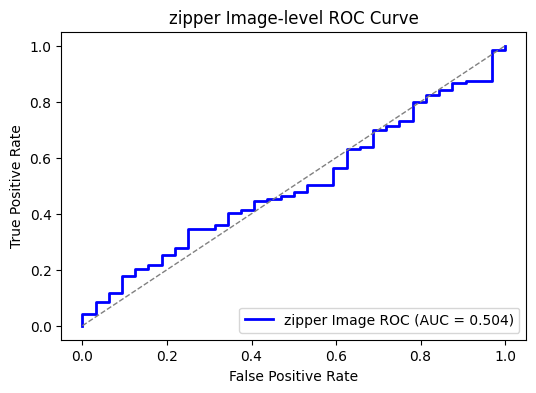

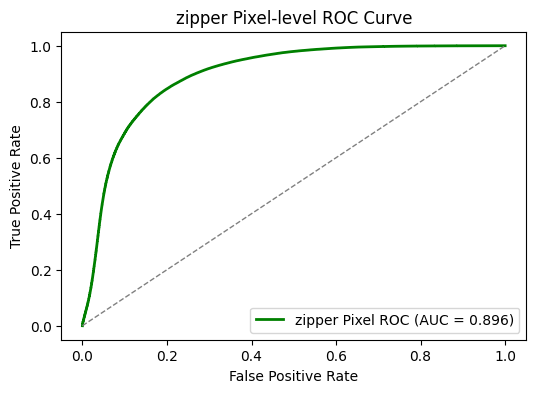

Saved all category results to results_mvtec_all.csv


In [3]:
# Multi-category PatchCore evaluation and ROC plotting
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from src.datasets.mvtec_loader import MVTecDataset
from src.backbones.resnet_features import ResNetBackbone
from src.baselines.improved_patchcore import ImprovedPatchCore
from src.eval.metrics import image_auc, pixel_auc, compute_aupro
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import cv2
import csv

def collate_patchcore(batch):
    clean_batch = [b for b in batch if b is not None]
    if len(clean_batch) == 0:
        return None
    imgs, masks, paths = zip(*clean_batch)
    imgs = torch.stack(imgs, dim=0)
    masks = list(masks)
    paths = list(paths)
    return imgs, masks, paths

DATA_ROOT = 'mvtec_anomaly_detection'
CATEGORIES = sorted([d for d in os.listdir(DATA_ROOT) if os.path.isdir(os.path.join(DATA_ROOT, d))])

results = []
for CATEGORY in CATEGORIES:
    print(f'\n=== Category: {CATEGORY} ===')
    train_ds = MVTecDataset(DATA_ROOT, CATEGORY, split='train')
    test_ds = MVTecDataset(DATA_ROOT, CATEGORY, split='test')
    train_loader = DataLoader(train_ds, batch_size=8, shuffle=False, collate_fn=collate_patchcore)
    test_loader = DataLoader(test_ds, batch_size=4, shuffle=False, collate_fn=collate_patchcore)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    backbone = ResNetBackbone(pretrained=True)
    pc = ImprovedPatchCore(
        backbone=backbone,
        device=device,
        n_neighbors=1,
        coreset_ratio=0.005,  # Lower for speed
        smoothing_radius=1
    )
    mem_shape = pc.build_memory(train_loader, selected_layers=("layer2", "layer3"))
    print('Memory shape:', mem_shape)

    image_scores, image_labels = [], []
    pixel_scores, pixel_labels = [], []
    pixel_maps_all, mask_maps_all = [], []
    pc.backbone.eval()
    for batch in tqdm(test_loader, desc=f'Testing {CATEGORY}'):
        if batch is None or len(batch) < 3:
            continue
        imgs, masks, paths = batch
        imgs = imgs.to(device)
        raw_maps, viz_maps = pc.score_batch(imgs, selected_layers=("layer2", "layer3"))
        for i, path in enumerate(paths):
            raw_map = raw_maps[i]
            image_score = float(raw_map.max())
            image_scores.append(image_score)
            mask = masks[i]
            label = 1 if (mask is not None and np.sum(mask) > 0) else 0
            image_labels.append(label)
            if mask is not None:
                mask_resized = mask.astype(np.uint8)
                raw_map_resized = np.array(cv2.resize(raw_map, (mask_resized.shape[1], mask_resized.shape[0])))
                pixel_scores.extend(raw_map_resized.flatten())
                pixel_labels.extend(mask_resized.flatten())
                pixel_maps_all.append(raw_map_resized.astype(np.float32))
                mask_maps_all.append(mask_resized.astype(np.uint8))

    img_auroc = image_auc(image_scores, image_labels)
    px_auc = pixel_auc(pixel_scores, pixel_labels) if pixel_labels else None
    aupro = compute_aupro(pixel_maps_all, mask_maps_all) if pixel_labels else None
    print(f"Image-AUROC: {img_auroc:.4f}")
    print(f"Pixel-AUROC: {px_auc:.4f}" if px_auc is not None else "Pixel-AUROC: N/A")
    print(f"AUPRO: {aupro:.4f}" if aupro is not None and not np.isnan(aupro) else "AUPRO: N/A")

    # Plot ROC curves
    if len(image_labels) > 1 and len(set(image_labels)) > 1:
        fpr_img, tpr_img, _ = roc_curve(image_labels, image_scores)
        roc_auc_img = auc(fpr_img, tpr_img)
        plt.figure(figsize=(6,4))
        plt.plot(fpr_img, tpr_img, color='blue', lw=2, label=f'{CATEGORY} Image ROC (AUC = {roc_auc_img:.3f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{CATEGORY} Image-level ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    if len(pixel_labels) > 1 and len(set(pixel_labels)) > 1:
        fpr_px, tpr_px, _ = roc_curve(pixel_labels, pixel_scores)
        roc_auc_px = auc(fpr_px, tpr_px)
        plt.figure(figsize=(6,4))
        plt.plot(fpr_px, tpr_px, color='green', lw=2, label=f'{CATEGORY} Pixel ROC (AUC = {roc_auc_px:.3f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{CATEGORY} Pixel-level ROC Curve')
        plt.legend(loc='lower right')
        plt.show()

    results.append({
        'category': CATEGORY,
        'image_auroc': round(img_auroc, 4) if img_auroc is not None else '',
        'pixel_auroc': round(px_auc, 4) if px_auc is not None else '',
        'aupro': round(aupro, 4) if (aupro is not None and not np.isnan(aupro)) else '',
        'time_sec': ''
    })

# Save all results to CSV
with open('results_mvtec_all.csv', 'w', newline='') as f:
    fieldnames = ['category','image_auroc','pixel_auroc','aupro','time_sec']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(results)
print('Saved all category results to results_mvtec_all.csv')